In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import timedelta

In [2]:
monday_data = pd.read_csv('./monday.csv', delimiter=';', index_col='timestamp', parse_dates=True)

In [23]:
monday_data.head()

,customer_no,location,unique_id
timestamp,,,
2019-09-02 07:03:00,1,dairy,0.1
2019-09-02 07:03:00,2,dairy,0.2
2019-09-02 07:04:00,3,dairy,0.3
2019-09-02 07:04:00,4,dairy,0.4
2019-09-02 07:04:00,5,spices,0.5


In [28]:
monday_data.index.date[0]

datetime.date(2019, 9, 2)

In [4]:
monday_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4884 entries, 2019-09-02 07:03:00 to 2019-09-02 21:50:00
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_no  4884 non-null   int64 
 1   location     4884 non-null   object
dtypes: int64(1), object(1)
memory usage: 114.5+ KB


## Total no of customers in each section

In [48]:
monday_data.groupby(['location']).count()

,customer_no
location,
checkout,1437
dairy,895
drinks,797
fruit,1005
spices,750


## Customers at checkout over time

In [49]:
monday_data[monday_data['location'] == 'checkout'].groupby(['timestamp', 'location']).count()

,,customer_no
timestamp,location,
2019-09-02 07:05:00,checkout,2
2019-09-02 07:06:00,checkout,2
2019-09-02 07:07:00,checkout,1
2019-09-02 07:08:00,checkout,3
2019-09-02 07:09:00,checkout,1
...,...,...
2019-09-02 21:44:00,checkout,1
2019-09-02 21:46:00,checkout,1
2019-09-02 21:47:00,checkout,2


## No of customers at each section over time

In [50]:
monday_data.groupby([monday_data.index.time, 'location'])[['customer_no']].count()

customer_no
         location             
07:03:00 dairy               2
07:04:00 dairy               2
         fruit               1
         spices              3
07:05:00 checkout            2
...                        ...
21:49:00 dairy               1
         fruit               2
         spices              2
21:50:00 dairy               1
         fruit               1

[2797 rows x 1 columns]

## Time spent by each customer in the supermarket

In [51]:
entry_time = monday_data.reset_index()[['customer_no', 'timestamp']].groupby('customer_no').min()
entry_time.sort_values('timestamp')

,timestamp
customer_no,
1,2019-09-02 07:03:00
2,2019-09-02 07:03:00
3,2019-09-02 07:04:00
4,2019-09-02 07:04:00
5,2019-09-02 07:04:00
...,...
1443,2019-09-02 21:47:00
1444,2019-09-02 21:48:00
1445,2019-09-02 21:49:00


In [52]:
entry_time.rename(columns={'timestamp': 'entry_time'}, inplace=True)
entry_time.loc[144]

entry_time   2019-09-02 08:26:00
Name: 144, dtype: datetime64[ns]

In [53]:
monday_data[monday_data['customer_no'] == 144]

,customer_no,location
timestamp,,
2019-09-02 08:26:00,144,drinks
2019-09-02 08:31:00,144,spices
2019-09-02 08:35:00,144,drinks
2019-09-02 08:36:00,144,checkout


In [54]:
monday_data.reset_index()[['customer_no', 'timestamp']].groupby('customer_no').max().loc[144]

timestamp   2019-09-02 08:36:00
Name: 144, dtype: datetime64[ns]

In [55]:
exit_time = monday_data.reset_index()[['customer_no', 'timestamp']].groupby('customer_no').max()
exit_time.sort_values('timestamp')

,timestamp
customer_no,
1,2019-09-02 07:05:00
5,2019-09-02 07:05:00
2,2019-09-02 07:06:00
3,2019-09-02 07:06:00
8,2019-09-02 07:07:00
...,...
1442,2019-09-02 21:49:00
1444,2019-09-02 21:49:00
1445,2019-09-02 21:49:00


In [56]:
exit_time.rename(columns={'timestamp': 'exit_time'}, inplace=True)
exit_time.loc[144]

exit_time   2019-09-02 08:36:00
Name: 144, dtype: datetime64[ns]

In [57]:
time_in_store = pd.DataFrame(exit_time['exit_time'] - entry_time['entry_time'], columns=['time_spent']).set_index(entry_time.index)
time_in_store

,time_spent
customer_no,
1,0 days 00:02:00
2,0 days 00:03:00
3,0 days 00:02:00
4,0 days 00:04:00
5,0 days 00:01:00
...,...
1443,0 days 00:01:00
1444,0 days 00:01:00
1445,0 days 00:00:00


In [58]:
time_in_store.loc[144]

time_spent   0 days 00:10:00
Name: 144, dtype: timedelta64[ns]

## total number of customers in the supermarket over time

In [59]:
monday_data.groupby([monday_data.index.time])[['customer_no']].count()

,customer_no
07:03:00,2
07:04:00,6
07:05:00,4
07:06:00,8
07:07:00,4
...,...
21:46:00,6
21:47:00,6
21:48:00,7
21:49:00,7


<AxesSubplot:xlabel='time'>

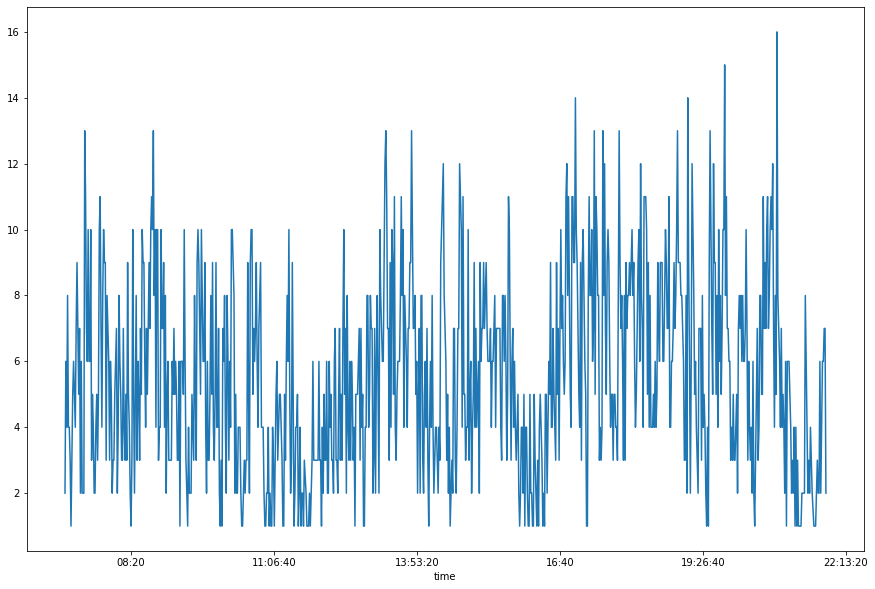

In [60]:
monday_data.groupby([monday_data.index.time])['customer_no'].count().plot(figsize=(15, 10))

In [61]:
monday_data.customer_no.nunique()

1447

In [62]:
checked_out = monday_data[monday_data.location == 'checkout'][['customer_no']]

In [63]:
checked_out

,customer_no
timestamp,
2019-09-02 07:05:00,1
2019-09-02 07:05:00,5
2019-09-02 07:06:00,2
2019-09-02 07:06:00,3
2019-09-02 07:07:00,8
...,...
2019-09-02 21:47:00,1438
2019-09-02 21:48:00,1431
2019-09-02 21:48:00,1434


In [64]:
default_exit_datetime = pd.to_datetime("2019-09-02 21:51:00")

In [65]:
default_exit_datetime

Timestamp('2019-09-02 21:51:00')

In [66]:
unchecked = []
for customer in monday_data.customer_no.unique():
    if customer not in checked_out.customer_no.unique():
        unchecked.append(customer)

In [67]:
unchecked

[1430, 1433, 1437, 1439, 1440, 1441, 1443, 1445, 1446, 1447]

In [68]:
unchecked_df = pd.DataFrame({'timestamp': [default_exit_datetime]*len(unchecked),
                            'customer_no': unchecked, 
                            'location': ['checkout']*len(unchecked)})

In [69]:
unchecked_df.set_index('timestamp', inplace=True)

In [70]:
unchecked_df

,customer_no,location
timestamp,,
2019-09-02 21:51:00,1430,checkout
2019-09-02 21:51:00,1433,checkout
2019-09-02 21:51:00,1437,checkout
2019-09-02 21:51:00,1439,checkout
2019-09-02 21:51:00,1440,checkout
2019-09-02 21:51:00,1441,checkout
2019-09-02 21:51:00,1443,checkout
2019-09-02 21:51:00,1445,checkout
2019-09-02 21:51:00,1446,checkout


In [71]:
monday_full = pd.concat([monday_data, unchecked_df], axis=0)

In [72]:
monday_full.sort_index()

,customer_no,location
timestamp,,
2019-09-02 07:03:00,1,dairy
2019-09-02 07:03:00,2,dairy
2019-09-02 07:04:00,3,dairy
2019-09-02 07:04:00,4,dairy
2019-09-02 07:04:00,5,spices
...,...,...
2019-09-02 21:51:00,1441,checkout
2019-09-02 21:51:00,1443,checkout
2019-09-02 21:51:00,1445,checkout


In [73]:
monday_full.groupby('location').count()

,customer_no
location,
checkout,1447
dairy,895
drinks,797
fruit,1005
spices,750


In [74]:
monday_new = monday_full.groupby('customer_no')[['location']].resample('T').fillna(method="ffill").reindex()


In [75]:
monday_final = monday_new.reset_index(level=['customer_no', 'timestamp']).sort_values(['timestamp', 'customer_no']).set_index('timestamp')

In [76]:
monday_final.head(30)

,customer_no,location
timestamp,,
2019-09-02 07:03:00,1,dairy
2019-09-02 07:03:00,2,dairy
2019-09-02 07:04:00,1,dairy
2019-09-02 07:04:00,2,dairy
2019-09-02 07:04:00,3,dairy
2019-09-02 07:04:00,4,dairy
2019-09-02 07:04:00,5,spices
2019-09-02 07:04:00,6,spices
2019-09-02 07:04:00,7,spices


In [77]:
monday_final.reset_index().groupby('customer_no').value_counts().tail(30)

customer_no  timestamp            location
1439         2019-09-02 21:50:00  fruit       1
             2019-09-02 21:51:00  checkout    1
1440         2019-09-02 21:46:00  drinks      1
             2019-09-02 21:47:00  drinks      1
             2019-09-02 21:48:00  drinks      1
             2019-09-02 21:49:00  spices      1
             2019-09-02 21:50:00  spices      1
             2019-09-02 21:51:00  checkout    1
1441         2019-09-02 21:49:00  spices      1
             2019-09-02 21:51:00  checkout    1
             2019-09-02 21:50:00  spices      1
             2019-09-02 21:48:00  drinks      1
             2019-09-02 21:47:00  dairy       1
1442         2019-09-02 21:47:00  fruit       1
             2019-09-02 21:48:00  fruit       1
             2019-09-02 21:49:00  checkout    1
1443         2019-09-02 21:47:00  fruit       1
             2019-09-02 21:48:00  dairy       1
             2019-09-02 21:49:00  dairy       1
             2019-09-02 21:50:00  dairy      

In [78]:
monday_final[monday_final['location'] != 'checkout'].groupby('location').count()/len(monday_final[monday_final['location'] != 'checkout'])

,customer_no
location,
dairy,0.374759
drinks,0.219118
fruit,0.274459
spices,0.131663


In [79]:
monday_final['following'] = monday_final.groupby('customer_no')[['location']].shift(-1)

In [80]:
monday_final.head(30)

,customer_no,location,following
timestamp,,,
2019-09-02 07:03:00,1,dairy,dairy
2019-09-02 07:03:00,2,dairy,dairy
2019-09-02 07:04:00,1,dairy,checkout
2019-09-02 07:04:00,2,dairy,dairy
2019-09-02 07:04:00,3,dairy,dairy
2019-09-02 07:04:00,4,dairy,dairy
2019-09-02 07:04:00,5,spices,checkout
2019-09-02 07:04:00,6,spices,dairy
2019-09-02 07:04:00,7,spices,drinks


In [81]:
pd.crosstab(monday_final['location'], monday_final['following'], normalize=0)

following,checkout,dairy,drinks,fruit,spices
location,,,,,
dairy,0.089689,0.744359,0.062268,0.051414,0.052271
drinks,0.208109,0.011236,0.610650,0.090865,0.079140
fruit,0.205928,0.087754,0.050702,0.608034,0.047582
spices,0.145528,0.191057,0.176423,0.096748,0.390244
